<a href="https://colab.research.google.com/github/gayakwadmilind/ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib scikit-learn

Linear Regression MSE: 0.9178
Ridge Regression MSE: 0.9127
Lasso Regression MSE: 0.9155
Polynomial Regression MSE: 0.9116


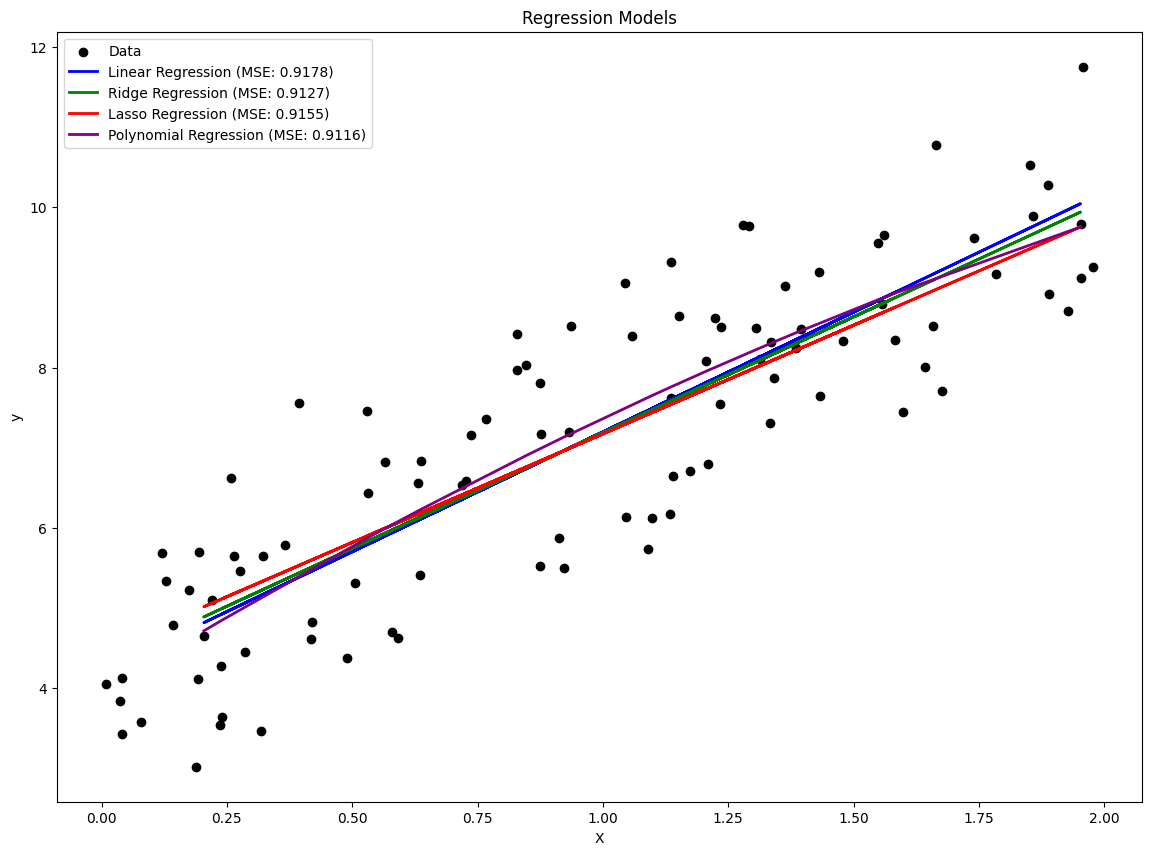

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)
poly_features = PolynomialFeatures(degree=2)

# Fit models
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Polynomial regression
X_poly = poly_features.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_poly = poly_reg.predict(poly_features.transform(X_test))

# Calculate losses (Mean Squared Error)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Print losses
print(f'Linear Regression MSE: {mse_lin:.4f}')
print(f'Ridge Regression MSE: {mse_ridge:.4f}')
print(f'Lasso Regression MSE: {mse_lasso:.4f}')
print(f'Polynomial Regression MSE: {mse_poly:.4f}')

# Plotting
plt.figure(figsize=(14, 10))

# Plot original data
plt.scatter(X, y, color='black', label='Data')

# Plot Linear Regression
plt.plot(X_test, y_pred_lin, color='blue', linewidth=2, label=f'Linear Regression (MSE: {mse_lin:.4f})')

# Plot Ridge Regression
plt.plot(X_test, y_pred_ridge, color='green', linewidth=2, label=f'Ridge Regression (MSE: {mse_ridge:.4f})')

# Plot Lasso Regression
plt.plot(X_test, y_pred_lasso, color='red', linewidth=2, label=f'Lasso Regression (MSE: {mse_lasso:.4f})')

# Plot Polynomial Regression
X_sorted = np.sort(X_test, axis=0)
y_pred_poly_sorted = poly_reg.predict(poly_features.transform(X_sorted))
plt.plot(X_sorted, y_pred_poly_sorted, color='purple', linewidth=2, label=f'Polynomial Regression (MSE: {mse_poly:.4f})')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Models')
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error: 46.1448
R-squared: 0.3708


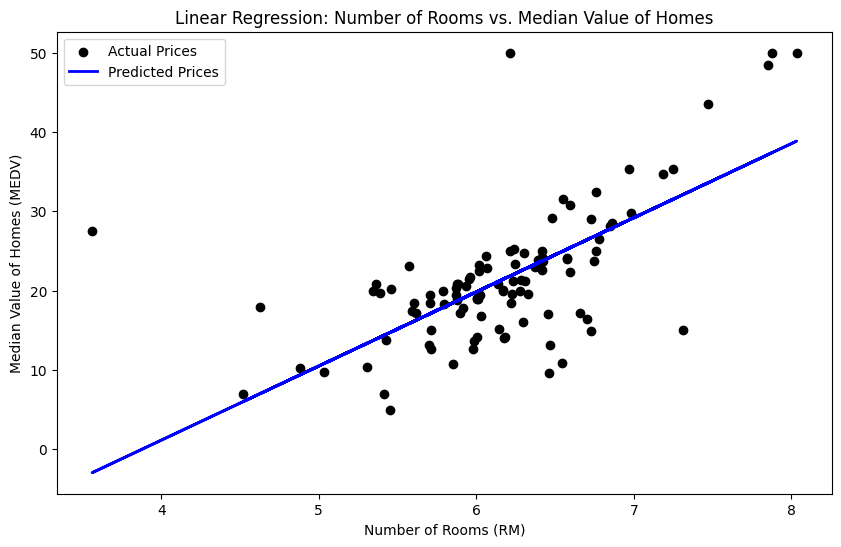

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.datasets import load_boston
from google.colab import drive
drive.mount('/content/drive')
data='/content/drive/MyDrive/HousingData.csv'
df=pd.read_csv(data)
df.head()
# Load the Boston housing dataset
#boston = load_boston()
#data = pd.DataFrame(boston.data, columns=boston.feature_names)
#data['MEDV'] = boston.target

# Selecting one feature for simplicity (e.g., the number of rooms)
X = df[['RM']].values
y = df['MEDV'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Prices')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted Prices')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Linear Regression: Number of Rooms vs. Median Value of Homes')
plt.legend()
plt.show()
